In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


In [2]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import pandas as pd

def draw_funnel_for_a_round(labels, vals, save_path="figures/round2/funnel_plot_tight"):
    df = pd.DataFrame({"Labels": labels, "Values": vals})

    with plt.style.context("fivethirtyeight"):
        plot_style_utils.set_pub_plot_context(context="talk")
        fig, ax = plot_style_utils.simple_ax()
        plot_style_utils.prettify_ax(ax)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        colors = ["#a9d18e", "#ffc000", "#ed7d31", "#5b9bd5", "#4472c4"]

        plt.fill_betweenx(y=[1, 3.9], x1=[9, 9.5], x2=[9, 8.5], color=colors[0])
        plt.fill_betweenx(y=[4, 6.9], x1=[9.5, 10], x2=[8.5, 8], color=colors[1])
        plt.fill_betweenx(y=[7, 9.9], x1=[10, 12], x2=[8, 6], color=colors[2])
        plt.fill_betweenx(y=[10, 12.9], x1=[12, 14], x2=[6, 4], color=colors[3])
        plt.fill_betweenx(y=[13, 15.9], x1=[14, 20], x2=[4, -2], color=colors[4])
        plt.xticks([],[])
        plt.yticks([2,5,8,11,14], df["Labels"][::-1],)
        plt.grid(visible=False)

    plot_style_utils.save_for_pub(fig=fig, path=save_path)
    plt.show()

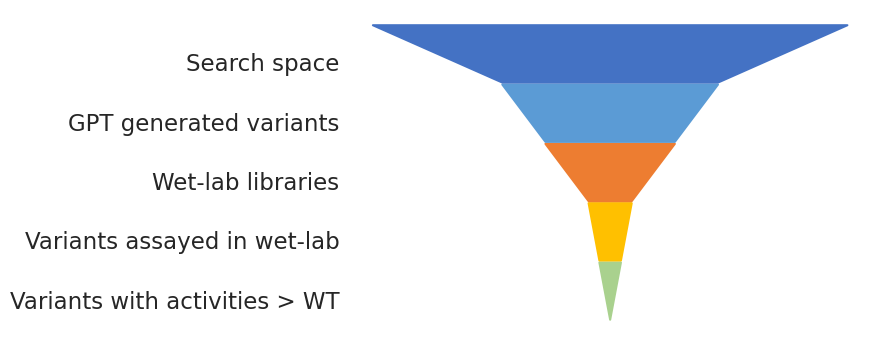

In [3]:
labels = ["Search space", "GPT generated variants", "Wet-lab libraries", "Variants assayed in wet-lab", "Variants with activities > WT"]
vals = [2.80e+17, 108738, 13728, 2396, 1820]

draw_funnel_for_a_round(labels, vals, save_path="figures/round2/Round1_funnel_plot_tight")

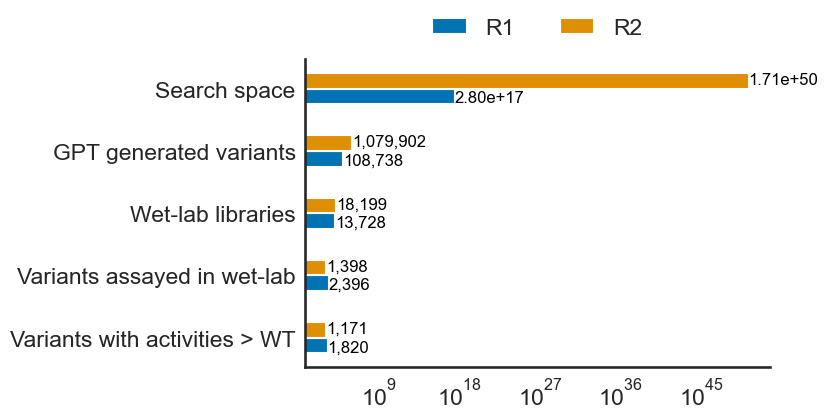

In [4]:
import numpy as np
labels = ["Search space", "GPT generated variants", "Wet-lab libraries", "Variants assayed in wet-lab", "Variants with activities > WT"]

R1 = [2.80e+17, 108738, 13728, 2396, 1820]
R2 = [1.71e+50, 1079902, 18199, 1398, 1171]

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

y = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
ax.barh(y-  width/2, R1[::-1], width, label='R1', color=plot_style_utils.CAT_PALETTE[0])
ax.barh(y + width/2, R2[::-1], width, label='R2', color=plot_style_utils.CAT_PALETTE[1])
# show values in each bar
for i, v in enumerate(R1[::-1]):
    vs = f"{int(v):,}" if v < 10000000 else f"{v:.2e}"
    ax.text(v + 0.5, i - 0.22, vs, color='black', fontsize=12)
for i, v in enumerate(R2[::-1]):
    vs = f"{v:,}" if v < 10000000 else f"{v:.2e}"
    ax.text(v + 0.5, i + 0.08, vs, color='black', fontsize=12)
ax.set_xscale("log")
ax.set_yticks(y)
ax.set_yticklabels(labels[::-1])

ax.legend(ncol=2, loc='upper center', frameon=False, handlelength=1.5, bbox_to_anchor=(0.5, 1.2))
plot_style_utils.save_for_pub(fig=fig, path="figures/round2/space_barh_chart")
plt.show()